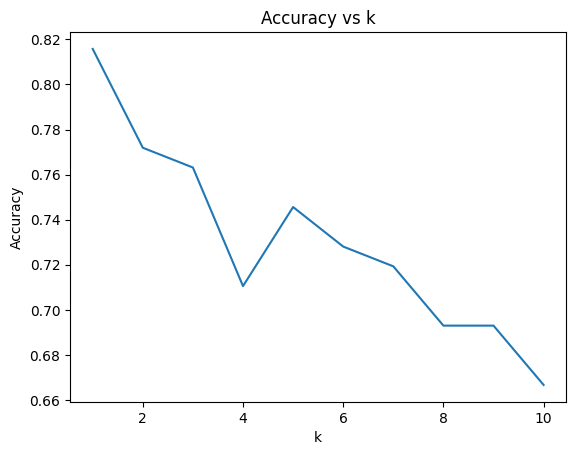

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("../../data/KNNAlgorithmDataset.csv")

featureColumns = data.columns.drop('diagnosis')

diagnosisColumn = data['diagnosis']

classes = data['diagnosis'].unique()
# Features and Target
X = data[featureColumns].values
Y = data['diagnosis'].values

np.random.seed(12)
indexes = np.random.permutation(len(X))

# Split the data into training and testing sets
splitIdx = int(0.8 * len(X))
trainIdx = indexes[:splitIdx]
testIdx = indexes[splitIdx:]

# Fill the missing values with the mean of the column
X_Filled = X.copy()

# Drop columns that are all NaN
X_Filled = X_Filled[:, ~np.all(np.isnan(X_Filled), axis=0)]

# Fill the missing values with the mean of the column
for col in range(X_Filled.shape[1]):
    colMean = np.nanmean(X_Filled[:, col])

    X_Filled[np.isnan(X_Filled[:, col]), col] = colMean


# Training and Testing Sets
X_train = X_Filled[trainIdx]
Y_train = Y[trainIdx]
X_test = X_Filled[testIdx]
Y_test = Y[testIdx]

# Majority Voting Function
def majorityVoting(neighbor_labels):
    unique_labels = np.unique(neighbor_labels)
    counts = []
    for label in unique_labels:
        counts.append(np.sum(neighbor_labels == label))
    return unique_labels[np.argmax(counts)]


def KNN(X_train, Y_train, X_test, Y_test, k):
    distances = np.zeros((len(X_test), len(X_train)))
    predicted_labels = []
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            dist = np.sqrt(np.sum((X_test[i] - X_train[j]) ** 2))
            distances[i, j] = dist  

        nearest_idx = np.argsort(distances[i])[:k]
        neighbor_labels = Y_train[nearest_idx]
        
        # majority voting
        predicted_label = majorityVoting(neighbor_labels)
        predicted_labels.append(predicted_label)
   
    return predicted_labels

accuracies = []
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for k in k_values:
    predicted_labels = KNN(X_train, Y_train, X_test, Y_test, k)
    accuracies.append(np.mean(predicted_labels == Y_test))

plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()
    

